In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()


In [2]:
df=pd.read_csv("/content/oasis_longitudinal.csv")
df.head(20)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [4]:
df['Group'].value_counts().sort_values()

Converted       37
Demented       146
Nondemented    190
Name: Group, dtype: int64

In [5]:
df=df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df=df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Drop unnecessary columns

In [6]:
# bar drawing function
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

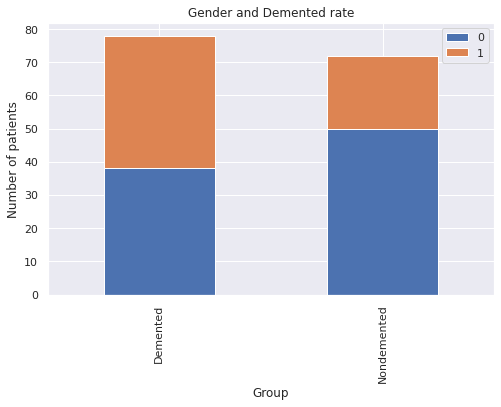

In [7]:
# Gender  and  Group ( Femal=0, Male=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

The above graph indicates that men are more likely with dementia than women.

(15.3, 30.0)

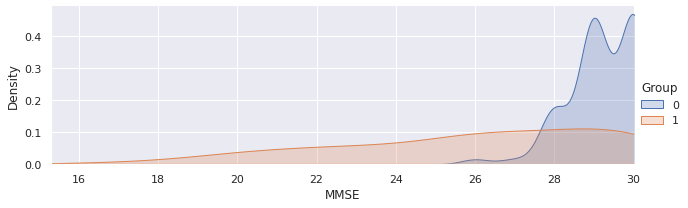

In [8]:
#MMSE : Mini Mental State Examination
# Nondemented = 0, Demented =1
# Nondemented has higher test result ranging from 25 to 30. 
#Min 17 ,MAX 30
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

The chart shows Nondemented group got much more higher MMSE scores than Demented group.

(0.6, 0.9)

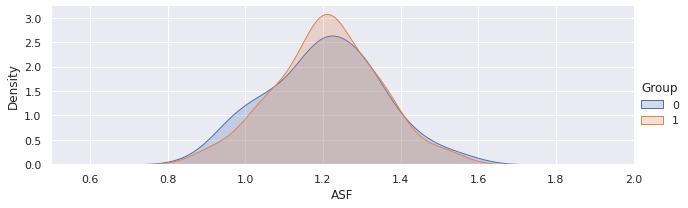

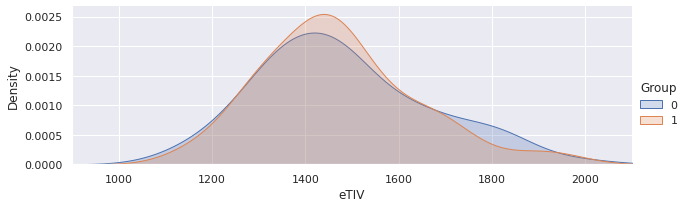

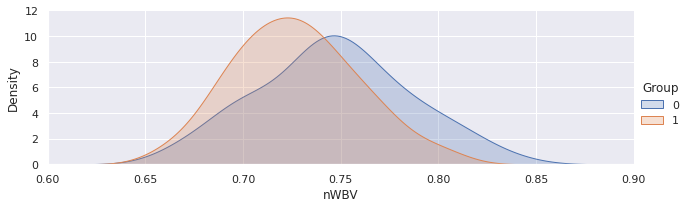

In [9]:
#bar_chart('ASF') = Atlas Scaling Factor
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Estimated Total Intracranial Volume
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalized Whole Brain Volume
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

The chart indicates that Nondemented group has higher brain volume ratio than Demented group. This is assumed to be because the diseases affect the brain to be shrinking its tissue.

(50.0, 100.0)

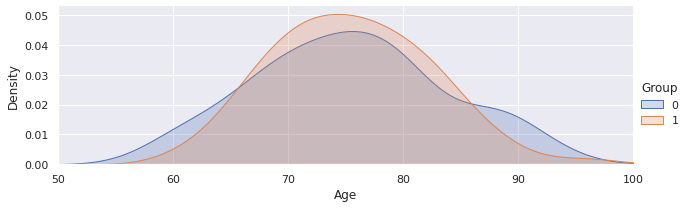

In [10]:
#AGE. Nondemented =0, Demented =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

There is a higher concentration of 70-80 years old in the Demented patient group than those in the nondemented patients. We guess patients who suffered from that kind of disease has lower survival rate so that there are a few of 90 years old.

(0.0, 0.16)

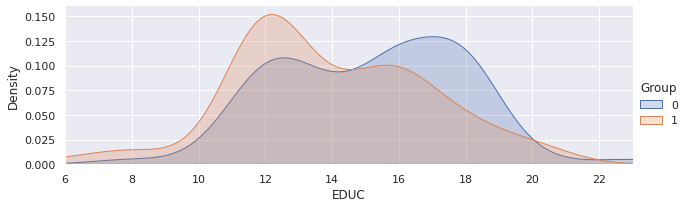

In [11]:
#'EDUC' = Years of Education
# Nondemented = 0, Demented =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

Intermediate Result Summary
1. Men are more likely with demented, an Alzheimer's Disease, than Women.

2. Demented patients were less educated in terms of years of education.

3. Nondemented group has higher brain volume than Demented group.

4. Higher concentration of 70-80 years old in Demented group than those in the nondemented patients.

## **Data Preprocessing**

We identified 8 rows with missing values in SES column. We deal with this issue with 2 approaches. One is just to drop the rows with missing values. The other is to replace the missing values with the corresponing values, also known as 'Imputation'. Since we have only 150 data, I assume imputation would help the performance of our model.



In [12]:
df.isnull().sum()
# The column, SES has 8 missing values

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [13]:
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [14]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [15]:
# I confirm there're no more missing values and all the 150 data were used.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

##Outlier detection and Capping

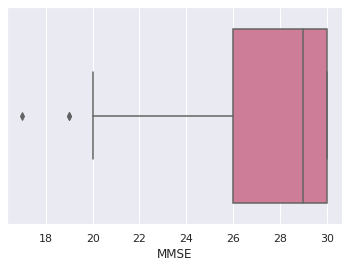

In [16]:
sns.boxplot(x=df['MMSE'],orient='h',color='palevioletred')

In [17]:
Q1 = df['MMSE'].quantile(0.25)

Q3 = df['MMSE'].quantile(0.75)

iqr = Q3 - Q1

print(iqr)

4.0


In [18]:
upper_limit = Q3 + 1.5 * iqr

lower_limit = Q1 - 1.5 * iqr

print(upper_limit,lower_limit)

36.0 20.0


In [19]:
df[df['MMSE'] > upper_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


In [20]:
df[df['MMSE'] < lower_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
38,OAS2_0048,1,0,1,66,16,1.0,19.0,1.0,1695,0.711,1.036
91,OAS2_0111,1,0,1,62,12,4.0,17.0,0.5,1525,0.732,1.151
127,OAS2_0157,1,0,0,73,12,2.0,19.0,1.0,1274,0.728,1.377


Outlier Capping for MMSE

In [21]:
new_df = df.copy()

new_df['MMSE'] = np.where(new_df['MMSE'] > upper_limit, upper_limit,

    np.where(

        new_df['MMSE'] < lower_limit,

        lower_limit,

        new_df['MMSE']

    )

)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

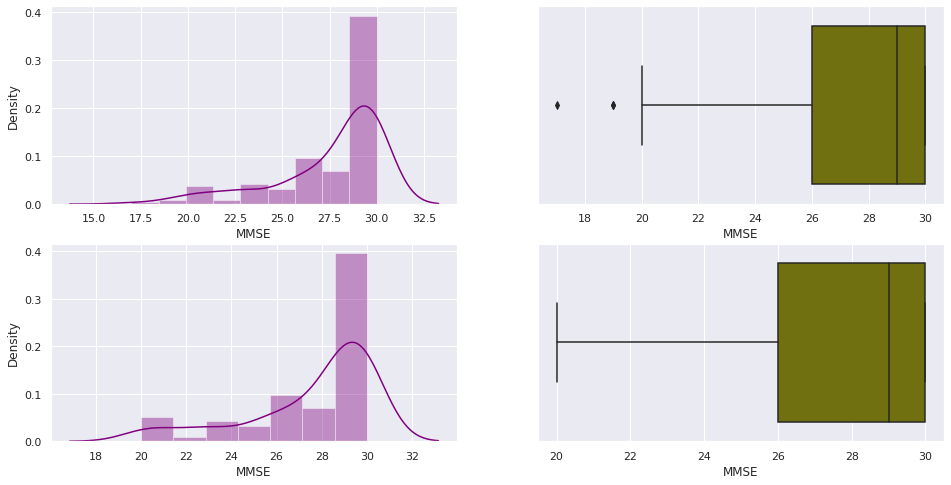

In [22]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)

sns.color_palette("Paired")

sns.distplot(df['MMSE'],color='purple')

plt.subplot(2,2,2)

sns.boxplot(df['MMSE'],color='olive')

plt.subplot(2,2,3)

sns.distplot(new_df['MMSE'],color = 'purple')

plt.subplot(2,2,4)

sns.boxplot(new_df['MMSE'],color='olive')

plt.show()

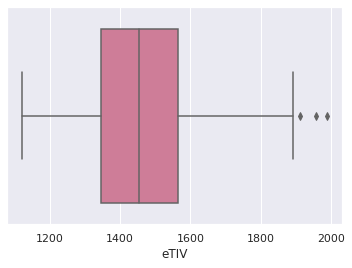

In [23]:
sns.boxplot(x=df['eTIV'],orient='h',color='palevioletred')

In [24]:
Q1 = df['eTIV'].quantile(0.25)

Q3 = df['eTIV'].quantile(0.75)

iqr = Q3 - Q1

print(iqr)

218.0


In [25]:
upper_limit = Q3 + 1.5 * iqr

lower_limit = Q1 - 1.5 * iqr

print(upper_limit,lower_limit)

1892.25 1020.25


In [26]:
df[df['eTIV'] > upper_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
15,OAS2_0021,1,0,1,72,20,1.0,26.0,0.5,1911,0.719,0.919
54,OAS2_0066,1,0,1,61,18,1.0,30.0,1.0,1957,0.734,0.897


In [27]:
df[df['eTIV'] < lower_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


Outlier Capping for eTIV

In [28]:

new_df['eTIV'] = np.where(new_df['eTIV'] > upper_limit, upper_limit,

    np.where(

        new_df['eTIV'] < lower_limit,

        lower_limit,

        new_df['eTIV']

    )

)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

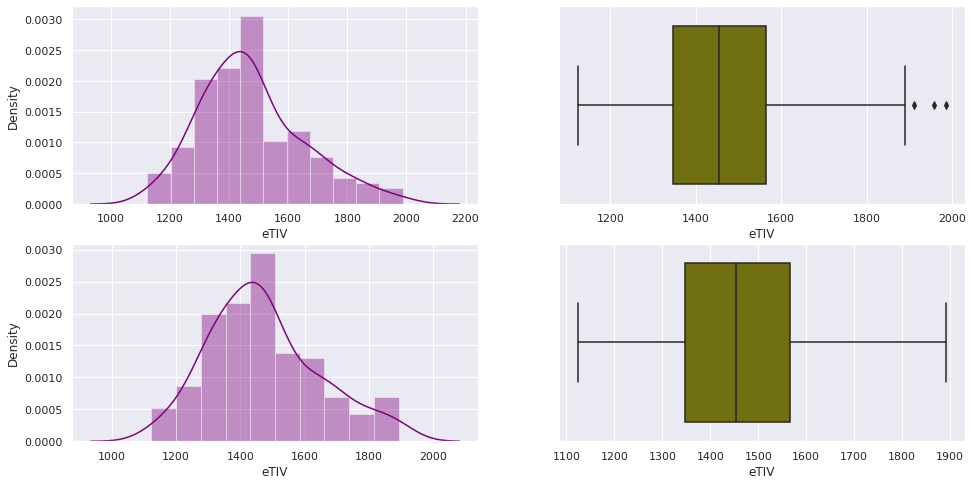

In [29]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)

sns.color_palette("Paired")

sns.distplot(df['eTIV'],color='purple')

plt.subplot(2,2,2)

sns.boxplot(df['eTIV'],color='olive')

plt.subplot(2,2,3)

sns.distplot(new_df['eTIV'],color = 'purple')

plt.subplot(2,2,4)

sns.boxplot(new_df['eTIV'],color='olive')

plt.show()

### Outlier Detection for nWBV Column

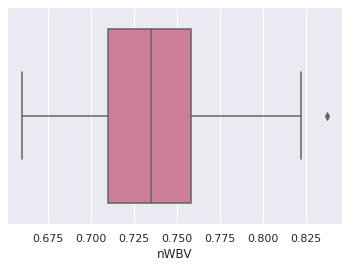

In [30]:
sns.boxplot(x=new_df['nWBV'],orient='h',color='palevioletred')

In [31]:
Q1 = df['nWBV'].quantile(0.25)

Q3 = df['nWBV'].quantile(0.75)

iqr = Q3 - Q1

print(iqr)

0.04775000000000007


In [32]:
upper_limit = Q3 + 1.5 * iqr

lower_limit = Q1 - 1.5 * iqr

print(upper_limit,lower_limit)

0.8293750000000002 0.6383749999999999


In [33]:
df[df['nWBV'] > upper_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
45,OAS2_0055,0,0,1,65,13,3.0,29.0,0.0,1362,0.837,1.289


In [34]:
df[df['nWBV']< lower_limit]

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF


 Outlier Capping for nWBV

In [35]:

new_df['nWBV'] = np.where(new_df['nWBV'] > upper_limit, upper_limit,

    np.where(

        new_df['nWBV'] < lower_limit,

        lower_limit,

        new_df['nWBV']

    )

)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

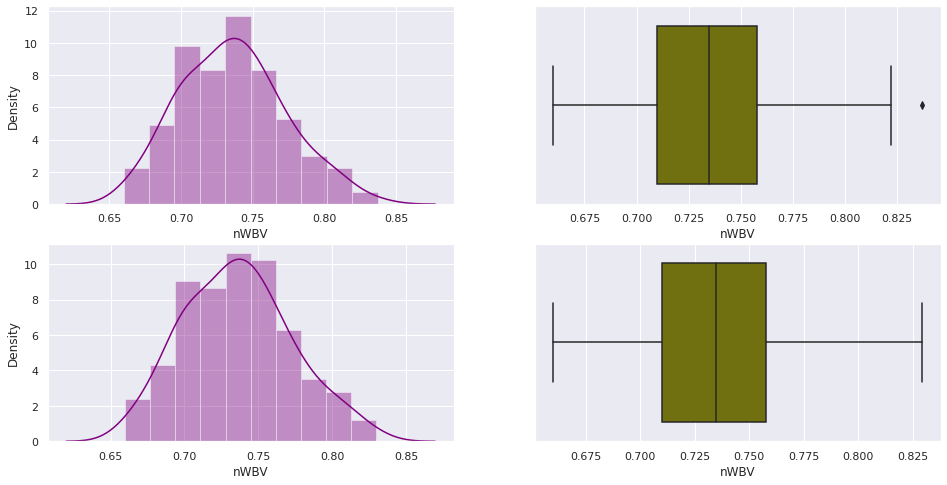

In [36]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)

sns.color_palette("Paired")

sns.distplot(df['nWBV'],color='purple')

plt.subplot(2,2,2)

sns.boxplot(df['nWBV'],color='olive')

plt.subplot(2,2,3)

sns.distplot(new_df['nWBV'],color = 'purple')

plt.subplot(2,2,4)

sns.boxplot(new_df['nWBV'],color='olive')

plt.show()

 .

Grouping ages into generation

In [37]:
min(new_df["Age"])

60

In [38]:
max(new_df["Age"])

96

In [39]:
new_df["Age"].value_counts().sort_values()

62     1
92     1
85     1
90     1
96     1
93     1
63     1
64     1
60     2
87     2
84     2
72     3
83     3
65     3
67     3
86     4
61     4
89     4
88     4
79     4
68     5
75     6
74     6
82     6
69     7
81     7
71     7
66     7
80     8
70     8
76     8
77     8
78     9
73    12
Name: Age, dtype: int64

In [40]:
for i in range(0, len(new_df['Age'])):
  if new_df['Age'][i]<71:
    new_df.loc[i, 'Age_Generation']='first'
  elif (new_df['Age'][i]<81):
    new_df.loc[i, 'Age_Generation']='second'
  elif (new_df['Age'][i]<91):
    new_df.loc[i, 'Age_Generation']='third'  
  else:
    new_df.loc[i, 'Age_Generation']='fourth'

In [41]:
new_df.Age_Generation.replace('first',1,inplace=True)
new_df.Age_Generation.replace('second',2,inplace=True)
new_df.Age_Generation.replace('third',3,inplace=True)
new_df.Age_Generation.replace('fourth',4,inplace=True)

In [42]:
new_df.head(20)

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Generation
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1892.25,0.696,0.883,3
1,OAS2_0002,1,0,1,75,12,3.0,23.0,0.5,1678.00,0.736,1.046,2
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215.00,0.710,1.444,3
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689.00,0.712,1.039,2
4,OAS2_0007,1,0,1,71,16,2.0,28.0,0.5,1357.00,0.748,1.293,2
5,OAS2_0008,0,0,0,93,14,2.0,30.0,0.0,1272.00,0.698,1.380,4
6,OAS2_0009,1,0,1,68,12,2.0,27.0,0.5,1457.00,0.806,1.205,1
7,OAS2_0010,1,0,0,66,12,3.0,30.0,0.5,1447.00,0.769,1.213,1
8,OAS2_0012,0,0,0,78,16,2.0,29.0,0.0,1333.00,0.748,1.316,2
9,OAS2_0013,0,0,0,81,12,4.0,30.0,0.0,1230.00,0.715,1.427,3


In [43]:
new_df.corr()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Generation
Group,1.000000,NaN,0.210282,0.002058,-0.212378,0.084437,-0.538030,0.768221,-0.031229,-0.265312,0.021365,-0.016727
MR Delay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M/F,0.210282,NaN,1.000000,-0.062457,0.070563,-0.034792,-0.216804,0.203178,0.574131,-0.244217,-0.564241,-0.091454
Age,0.002058,NaN,-0.062457,1.000000,-0.065513,-0.012407,-0.039611,-0.039313,-0.010362,-0.558175,0.020708,0.921304
EDUC,-0.212378,NaN,0.070563,-0.065513,1.000000,-0.727861,0.216912,-0.227556,0.236845,0.049417,-0.218819,-0.045373
SES,0.084437,NaN,-0.034792,-0.012407,-0.727861,1.000000,-0.188006,0.148746,-0.233563,0.021706,0.226172,-0.031447
MMSE,-0.538030,NaN,-0.216804,-0.039611,0.216912,-0.188006,1.000000,-0.700159,-0.052930,0.330864,0.058925,-0.032923
CDR,0.768221,NaN,0.203178,-0.039313,-0.227556,0.148746,-0.700159,1.000000,0.034968,-0.310860,-0.039840,-0.053008
eTIV,-0.031229,NaN,0.574131,-0.010362,0.236845,-0.233563,-0.052930,0.034968,1.000000,-0.194098,-0.990489,-0.071010
nWBV,-0.265312,NaN,-0.244217,-0.558175,0.049417,0.021706,0.330864,-0.310860,-0.194098,1.000000,0.190498,-0.512526


### Splitting Train/Validation/Test Sets

In [44]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [45]:
# Dataset with imputation

Y = new_df['Group'].values # Target for the model
X = new_df[['M/F', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF','Age_Generation']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, test_size=0.2,random_state=0)

# Feature scaling
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)

## **MODEL**

### Logistic Regression

The parameter C, inverse of regularization strength.

Tuning range: [0.001, 0.1, 1, 10, 100]

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [47]:
acc = [] # list to store all performance metric

In [48]:
# Dataset with imputation
best_score=0
kfolds=10 # set the number of folds

for c in [0.001,0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression '
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best accuracy on validation set is: 0.7416666666666667
Best parameter for regularization (C) is:  100
Test accuracy with best C parameter is 0.8333333333333334
Test recall with the best C parameter is 0.7857142857142857
Test AUC with the best C parameter is 0.8303571428571429


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


## SVM

Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [49]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7500000000000001
Best parameter for c is:  100
Best parameter for gamma is:  0.001
Best parameter for kernel is:  linear
Test accuracy with the best parameters is 0.7666666666666667
Test recall with the best parameters is 0.6428571428571429
Test AUC with the best parameter is 0.7589285714285714


Decision Tree

Maximum depth. [1, 2, ..., 8]

8 is the number of features

In [50]:
best_score = 0

for md in range(1, 9): # iterate different maximum depth values
    # train the model
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.775
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.8333333333333334
Test recall with best parameters is  0.6428571428571429
Test AUC with the best parameter is  0.8214285714285714


In [51]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0'],
       ['Age_Generation', '0.0']], dtype='<U32')

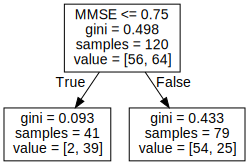

In [52]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)  
graph

Random Forest Classifier


n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree.

In [53]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7833333333333334
Best parameters of M, d, m are:  6 2 2
Test accuracy with the best parameters is 0.9
Test recall with the best parameters is: 0.7857142857142857
Test AUC with the best parameters is: 0.8928571428571428


In [54]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.04361395375427422'],
       ['EDUC', '0.08014030727116774'],
       ['SES', '0.048397389094942365'],
       ['MMSE', '0.39921745041356776'],
       ['eTIV', '0.08742252879405989'],
       ['nWBV', '0.15867503762253923'],
       ['ASF', '0.1618403307508228'],
       ['Age_Generation', '0.02069300229862598']], dtype='<U32')

AdaBoost

In [55]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
        # train the model
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)

        # perform cross-validation
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        # compute mean cross-validation accuracy
        score = np.mean(scores)

        # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

# Rebuild a model on the combined training and validation set        
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.775
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.9
Test recall with the best parameters is: 0.6428571428571429
Test AUC with the best parameters is: 0.7901785714285714


In [56]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['EDUC', '0.07142857142857142'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.14285714285714285'],
       ['nWBV', '0.5'],
       ['ASF', '0.0'],
       ['Age_Generation', '0.0']], dtype='<U32')

Trying with Fuzzy Algorithm 

In [57]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=a989f49d0d7fba35e968360394746d033f49f12306a29eced3b55fff9f207629
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [58]:
import numpy as np                          # linear algebra
import pandas as pd                         # data processing
import skfuzzy as fuzz                      # fuzzy logic
import matplotlib.pyplot as plt             # visualization
plt.style.use('seaborn-whitegrid')          # graph settings
plt.rcParams['figure.figsize'] = (10, 5)    # graph settings

In [59]:
new_df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Generation
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1892.25,0.696,0.883,3
1,OAS2_0002,1,0,1,75,12,3.0,23.0,0.5,1678.00,0.736,1.046,2
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215.00,0.710,1.444,3
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689.00,0.712,1.039,2
4,OAS2_0007,1,0,1,71,16,2.0,28.0,0.5,1357.00,0.748,1.293,2


In [60]:
new_df.corr()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Generation
Group,1.000000,NaN,0.210282,0.002058,-0.212378,0.084437,-0.538030,0.768221,-0.031229,-0.265312,0.021365,-0.016727
MR Delay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
M/F,0.210282,NaN,1.000000,-0.062457,0.070563,-0.034792,-0.216804,0.203178,0.574131,-0.244217,-0.564241,-0.091454
Age,0.002058,NaN,-0.062457,1.000000,-0.065513,-0.012407,-0.039611,-0.039313,-0.010362,-0.558175,0.020708,0.921304
EDUC,-0.212378,NaN,0.070563,-0.065513,1.000000,-0.727861,0.216912,-0.227556,0.236845,0.049417,-0.218819,-0.045373
SES,0.084437,NaN,-0.034792,-0.012407,-0.727861,1.000000,-0.188006,0.148746,-0.233563,0.021706,0.226172,-0.031447
MMSE,-0.538030,NaN,-0.216804,-0.039611,0.216912,-0.188006,1.000000,-0.700159,-0.052930,0.330864,0.058925,-0.032923
CDR,0.768221,NaN,0.203178,-0.039313,-0.227556,0.148746,-0.700159,1.000000,0.034968,-0.310860,-0.039840,-0.053008
eTIV,-0.031229,NaN,0.574131,-0.010362,0.236845,-0.233563,-0.052930,0.034968,1.000000,-0.194098,-0.990489,-0.071010
nWBV,-0.265312,NaN,-0.244217,-0.558175,0.049417,0.021706,0.330864,-0.310860,-0.194098,1.000000,0.190498,-0.512526


### Universe Variables

In [61]:
new_df.describe()

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Age_Generation
count,150.000000,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.520000,0.0,0.413333,75.446667,14.533333,2.513333,27.593333,0.260000,1473.238333,0.736023,1.206333,1.986667
std,0.501274,0.0,0.494081,7.545421,2.874714,1.103604,2.868708,0.326256,171.530168,0.036322,0.137864,0.768391
min,0.000000,0.0,0.000000,60.000000,6.000000,1.000000,20.000000,0.000000,1123.000000,0.660000,0.883000,1.000000
25%,0.000000,0.0,0.000000,70.000000,12.000000,2.000000,26.000000,0.000000,1347.250000,0.710000,1.121000,1.000000
50%,1.000000,0.0,0.000000,75.000000,14.000000,2.000000,29.000000,0.000000,1453.500000,0.735000,1.207500,2.000000
75%,1.000000,0.0,1.000000,80.000000,16.000000,3.000000,30.000000,0.500000,1565.250000,0.757750,1.302750,2.000000
max,1.000000,0.0,1.000000,96.000000,23.000000,5.000000,30.000000,1.000000,1892.250000,0.829375,1.563000,4.000000


In [75]:
# Generate universe variables for input

x_cdr = np.arange(0,  1.5,0.5)
x_grp=np.arange(0,1.5,0.5)


###Generate fuzzy membership functions

In [76]:



cdr_low=fuzz.trimf(x_cdr,[0,0,0.5])
cdr_medium=fuzz.trimf(x_cdr,[0,0.5,1])
cdr_high=fuzz.trimf(x_cdr,[0.5,1,1])

grp_low=fuzz.trimf(x_grp,[0,0,0.3])
grp_medium=fuzz.trimf(x_grp,[0.3,0.5,0.7])
grp_high=fuzz.trimf(x_grp,[0.5,1,1])

### Visualize these universes and membership functions

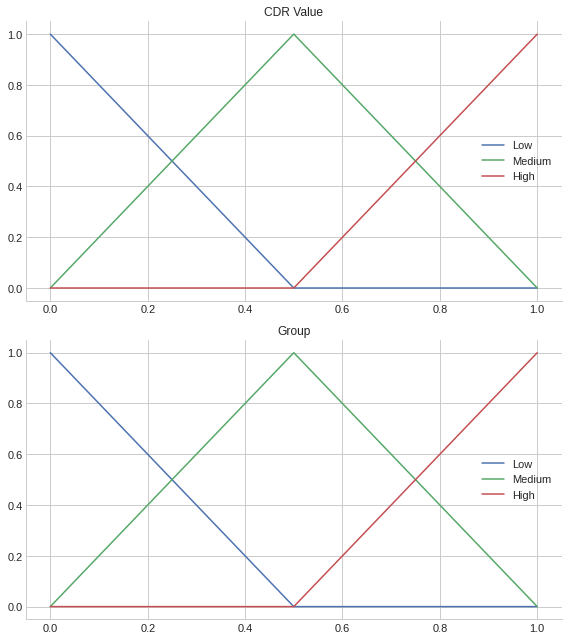

In [78]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(8, 9))


ax1.plot(x_cdr, cdr_low, 'b', linewidth=1.5, label='Low')
ax1.plot(x_cdr, cdr_medium, 'g', linewidth=1.5, label='Medium')
ax1.plot(x_cdr, cdr_high, 'r', linewidth=1.5, label='High')
ax1.set_title('CDR Value')
ax1.legend()

ax2.plot(x_grp, grp_low, 'b', linewidth=1.5, label='Low')
ax2.plot(x_grp,grp_medium, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_grp, grp_high, 'r', linewidth=1.5, label='High')
ax2.set_title('Group')
ax2.legend()

# Turn off top/right axes
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

###Fuzzy rules

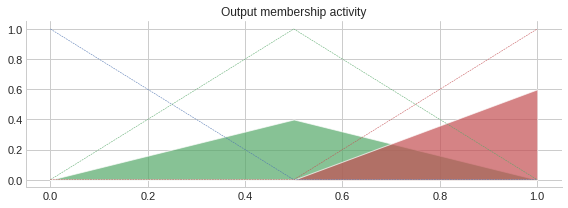

In [79]:
cdr_value=0.8
cdr_level_lo = fuzz.interp_membership(x_cdr, cdr_low, cdr_value)
cdr_level_md = fuzz.interp_membership(x_cdr, cdr_medium, cdr_value)
cdr_level_hi = fuzz.interp_membership(x_cdr, cdr_high, cdr_value)

grp_activation_lo = np.fmin(cdr_level_lo, grp_low)
grp_activation_md = np.fmin(cdr_level_md, grp_medium)
grp_activation_hi = np.fmin(cdr_level_hi, grp_high)

grp0 = np.zeros_like(x_grp)

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_grp, grp0, grp_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_grp, grp_low, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_grp, grp0, grp_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_grp, grp_medium, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_grp, grp0, grp_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_grp, grp_high, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Defuzzification

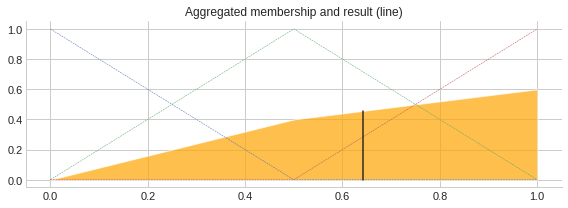

In [80]:
# Aggregate all three output membership functions together
aggregated = np.fmax(grp_activation_lo,
                     np.fmax(grp_activation_md, grp_activation_hi))

# Calculate defuzzified result
grp = fuzz.defuzz(x_grp, aggregated, 'centroid')
grp_activation = fuzz.interp_membership(x_grp, aggregated, grp)  # for plot

# Visualize this
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_grp, grp_low, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_grp, grp_medium, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_grp, grp_high, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_grp, grp0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([grp, grp], [0, grp_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Turn off top/right axes
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [81]:

val=(aggregated[2])
type(val)
val

0.6000000000000001

Part to be done -With the help of C value just print whether it is low middle or high

In [82]:
if ((val>0.7) & (val<=1)):
  print("Alzheimer Level : High ")
elif ((val>0.3) & (val<=0.7)):
  print("Alzheimer Level : Medium")
else:
  print("Alzheimer Level : Low")

Alzheimer Level : Medium


Conclusion


Result

In [83]:
# Performance Metric for each model
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]



,Model,Accuracy,Recall,AUC
0,Logistic Regression,0.833333,0.785714,0.830357
1,SVM,0.766667,0.642857,0.758929
2,Decision Tree,0.833333,0.642857,0.821429
3,Random Forest,0.900000,0.785714,0.892857
4,AdaBoost,0.900000,0.642857,0.790179
